In [1]:
#sklearn涵盖了机器学习中的样例数据、数据预处理、模型验证、特征选择、分类、回归、聚类、降维等几乎所有环节
from sklearn import datasets
#pandas 是python的一个数据分析包
from pandas import DataFrame
import pandas as pd
#numpy支持大量维度组与矩阵运算，也针对数学组给出大量数学函数库
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
"""
导入数据，分别输入特征和标签
"""
#返回iris数据集所有输入特征
x_data = datasets.load_iris().data
#返回iris数据集所有标签
y_data = datasets.load_iris().target

In [3]:
"""
随机打乱数据（因为原数据是顺序的，顺序不打乱会影响准确度）
seed：随机数种子，是一个整数，当设置后，每次生成的随机数都一样
"""
np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

In [4]:
"""
将打乱后的数据集分为测试集和训练集
"""
#[:-30]意思为倒数30个数据不取
x_train = x_data[:-30]
y_train = y_data[:-30]
#[-30]意思为倒数30个数据取
x_test = x_data[-30:]
y_test = y_data[-30:]

In [5]:
"""
将数据类型强制转换为float32类型 
"""
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

In [6]:
#y_train = tf.cast(y_train, tf.float32)
#y_test = tf.cast(y_test, tf.float32)

In [7]:
#将训练集和测试集打包成每组32个数据
#tf.data.Dataset.from_tensor_silces()函数使特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [8]:
"""
生成神经网络的参数，4个输入特征，所以输入层为4个输入节点；因为三分类，所以输出层三个神经元
用tf.Variable()标记参数可训练
使用seed参数使每次生成的随机数相同（现实使用不写参数）
stddev为标准差
"""
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
w1 = tf.cast(w1, tf.float32)
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))
b1 = tf.cast(b1, tf.float32)

In [9]:
"""
定义超参数和画图用的参数
"""
lr = 0.1 #学习率为0.1
train_loss_results = [] #将每轮loss记录在此表中，为后期画loss曲线提供数据
test_acc = [] #将每轮acc记录在此表中，为后期画acc曲线提供数据
epoch = 500 #循环500轮
loss_all = 0 #每轮分4个step，loss_all记录四个step生成的4个loss的和

In [10]:
#训练部分
for epoch in range(epoch): #数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db): #batch级别的循环，每个step循环
        with tf.GradientTape() as tape: #with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1 #神经网络乘加运算
            y = tf.nn.softmax(y) #使输出y符合概率分布
            y_ = tf.one_hot(y_train, depth=3) #将标签值转换为独热码形式
            loss = tf.reduce_mean(tf.square(y_ - y)) #采用均方误差损失函数mse=
            loss_all += loss.numpy() #将每个step计算出loss的累加，为后续求loss平均值提供数据
        #计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1,b1])
        #实现梯度自更新
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
    #每个epoch打印loss信息
    print("Epoch{}, loss{}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all/4) #将4个step的loss求平均值记录在此变量中
    loss_all = 0 #loss_all归零，为记录下个epoch的loss做准备
#测试部分
    total_correct ,total_number = 0, 0
    for x_test, y_test in test_db:
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y ,axis=1)
        pred = tf.cast(pred, dtype=y_test.dtype)
        correct = tf.cast(tf.equal(pred, y_test),dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
        total_number += x_test.shape[0]
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc", acc)
    print("-----------------------------")

Epoch0, loss0.2821310982108116
Test_acc 0.16666666666666666
-----------------------------
Epoch1, loss0.25459613651037216
Test_acc 0.16666666666666666
-----------------------------
Epoch2, loss0.22570250183343887
Test_acc 0.16666666666666666
-----------------------------
Epoch3, loss0.21028399094939232
Test_acc 0.16666666666666666
-----------------------------
Epoch4, loss0.19942265003919601
Test_acc 0.16666666666666666
-----------------------------
Epoch5, loss0.18873637542128563
Test_acc 0.5
-----------------------------
Epoch6, loss0.17851299047470093
Test_acc 0.5333333333333333
-----------------------------
Epoch7, loss0.16922875121235847
Test_acc 0.5333333333333333
-----------------------------
Epoch8, loss0.16107672825455666
Test_acc 0.5333333333333333
-----------------------------
Epoch9, loss0.15404684096574783
Test_acc 0.5333333333333333
-----------------------------
Epoch10, loss0.14802725985646248
Test_acc 0.5333333333333333
-----------------------------
Epoch11, loss0.14287

Epoch97, loss0.0703988391906023
Test_acc 0.8
-----------------------------
Epoch98, loss0.07007317803800106
Test_acc 0.8333333333333334
-----------------------------
Epoch99, loss0.0697510177269578
Test_acc 0.8666666666666667
-----------------------------
Epoch100, loss0.06943229585886002
Test_acc 0.8666666666666667
-----------------------------
Epoch101, loss0.06911697145551443
Test_acc 0.8666666666666667
-----------------------------
Epoch102, loss0.06880500353872776
Test_acc 0.8666666666666667
-----------------------------
Epoch103, loss0.06849635392427444
Test_acc 0.8666666666666667
-----------------------------
Epoch104, loss0.06819096207618713
Test_acc 0.8666666666666667
-----------------------------
Epoch105, loss0.06788880005478859
Test_acc 0.8666666666666667
-----------------------------
Epoch106, loss0.0675898240879178
Test_acc 0.8666666666666667
-----------------------------
Epoch107, loss0.06729398388415575
Test_acc 0.9
-----------------------------
Epoch108, loss0.06700124

Epoch198, loss0.04954243078827858
Test_acc 1.0
-----------------------------
Epoch199, loss0.049416118301451206
Test_acc 1.0
-----------------------------
Epoch200, loss0.049290808849036694
Test_acc 1.0
-----------------------------
Epoch201, loss0.04916647635400295
Test_acc 1.0
-----------------------------
Epoch202, loss0.04904312454164028
Test_acc 1.0
-----------------------------
Epoch203, loss0.04892072919756174
Test_acc 1.0
-----------------------------
Epoch204, loss0.048799293115735054
Test_acc 1.0
-----------------------------
Epoch205, loss0.0486788023263216
Test_acc 1.0
-----------------------------
Epoch206, loss0.048559244722127914
Test_acc 1.0
-----------------------------
Epoch207, loss0.048440602608025074
Test_acc 1.0
-----------------------------
Epoch208, loss0.04832287039607763
Test_acc 1.0
-----------------------------
Epoch209, loss0.048206047154963017
Test_acc 1.0
-----------------------------
Epoch210, loss0.04809011425822973
Test_acc 1.0
------------------------

Epoch309, loss0.03981154039502144
Test_acc 1.0
-----------------------------
Epoch310, loss0.03975124657154083
Test_acc 1.0
-----------------------------
Epoch311, loss0.03969130292534828
Test_acc 1.0
-----------------------------
Epoch312, loss0.039631683845072985
Test_acc 1.0
-----------------------------
Epoch313, loss0.039572392124682665
Test_acc 1.0
-----------------------------
Epoch314, loss0.03951343195512891
Test_acc 1.0
-----------------------------
Epoch315, loss0.03945479588583112
Test_acc 1.0
-----------------------------
Epoch316, loss0.03939648391678929
Test_acc 1.0
-----------------------------
Epoch317, loss0.039338492788374424
Test_acc 1.0
-----------------------------
Epoch318, loss0.03928081365302205
Test_acc 1.0
-----------------------------
Epoch319, loss0.03922345442697406
Test_acc 1.0
-----------------------------
Epoch320, loss0.03916640533134341
Test_acc 1.0
-----------------------------
Epoch321, loss0.039109666366130114
Test_acc 1.0
-------------------------

Test_acc 1.0
-----------------------------
Epoch423, loss0.03458422515541315
Test_acc 1.0
-----------------------------
Epoch424, loss0.0345494719222188
Test_acc 1.0
-----------------------------
Epoch425, loss0.03451487049460411
Test_acc 1.0
-----------------------------
Epoch426, loss0.034480403177440166
Test_acc 1.0
-----------------------------
Epoch427, loss0.03444609697908163
Test_acc 1.0
-----------------------------
Epoch428, loss0.03441191650927067
Test_acc 1.0
-----------------------------
Epoch429, loss0.03437788086012006
Test_acc 1.0
-----------------------------
Epoch430, loss0.03434399655088782
Test_acc 1.0
-----------------------------
Epoch431, loss0.0343102402985096
Test_acc 1.0
-----------------------------
Epoch432, loss0.034276630729436874
Test_acc 1.0
-----------------------------
Epoch433, loss0.03424315480515361
Test_acc 1.0
-----------------------------
Epoch434, loss0.03420981299132109
Test_acc 1.0
-----------------------------
Epoch435, loss0.03417661180719733

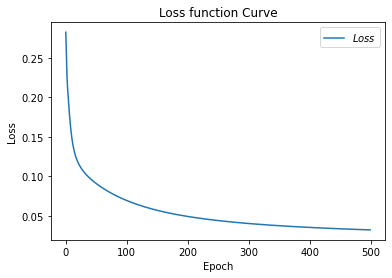

In [11]:
#绘制loss曲线
plt.title('Loss function Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_loss_results, label = "$Loss$")
plt.legend()
plt.show()

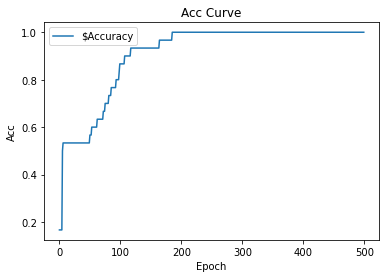

In [12]:
#绘制accurary曲线
plt.title('Acc Curve')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.plot(test_acc, label="$Accuracy")
plt.legend()
plt.show()